# <font color='blue'>ASTR 21100/31200 </font>

# <font color='blue'>"Computational Techniques in Astrophysics"</font>

# <font color='blue'>Sampling higher dimensional distributions</font>


In [1]:
import numpy as np 

# use jupyter "magic" command to tell it to embed plot into the notebook 
import matplotlib.pyplot as plt
%matplotlib inline

from codes.plotting import plot_prettier
plot_prettier()

### <font color='blue'>Sampling higher dimensional distributions</font>

Can we still use inverse transform or rejection sampling to sample from distributions of more than 1 variable? (i.e. sample $x$ and $y$ from $p(x,y)$, or $x$, $y$, and $z$ from $p(x,y,z)$, etc.)


This depends on how well we know the distribution we are sampling from and what it is. If we are sampling from say $p(x,y)$ where $y$ does not depend on $x$, i.e., $p(x,y)=p_x(x)p_y(y)$, we can simply sample $x$ and $y$ independently using inverse transform method with their respective cdfs: 

$$
P_x(x) = \int\limits_{-\infty}^x p_x(x^\prime)dx^\prime\int\limits_{-\infty}^{\infty} p_y(y)dy=\int\limits_{-\infty}^x p_x(x^\prime)dx^\prime,
$$

$$
P_y(y) = \int\limits_{-\infty}^y p(y^\prime)dy^\prime\int\limits_{-\infty}^{\infty} p_x(x)dx=\int\limits_{-\infty}^y p(y^\prime)dy^\prime.
$$
 
or with the rejection method.


If instead $x$ and $y$ do depend on each other, by rules of probability: 

$$
p(x,y) = p(x|y) p_y(y)=p(y|x) p_x(x),
$$

where

$$p_x(x)=\int\limits_{-\infty}^\infty p(x,y)dy;\ \ \ p_y(y)=\int\limits_{-\infty}^\infty p(x,y)dx;$$

and thus samples of $x$ have to be drawn in a way dependent on samples of $y$ to respect these rules. For example, we can draw a sample $x_i$ from $p_x(x)$, then draw $y$ from $p(y|x_i) p_x(x_i)$ if the functional form of $p(y|x_i) p_x(x_i)$ is known and allows easy application of the inverse transform or rejection method. 

In 2 and 3 dimensions this may work and rejection and inverse transform methods are sometimes used, but in higher number of dimensions this becomes difficult or impossible due to the so-called *curse of dimensionality* (complexity and memory requirements increasing exponentially with growing number of dimensions). 

For sampling multi-dimensional functions the Markov Chain Monte Carlo (MCMC) approach is used in most applications. 

### <font color='blue'>A generic way to sample multi-dimensional distributions: Markov Chain Monte Carlo (MCMC)</font> 

In a seminal 1953 paper <a href="http://adsabs.harvard.edu/abs/1953JChPh..21.1087M">"*Equation of State Calculations by Fast Computing Machines*"</a>, by Nicholas Metropolis, Arianna Rosenbluth, Marshall Rosenbluth, Augusta Teller, and Edward Teller, used a novel method to produce samples in a Monte Carlo model of a
system of interacting particles approaching thermodynamic equilibrium. 

Despite the highly specific application of the original paper, the approach they used is generic and can be used to sample 
pdfs in any number of dimensions, even when normalization of the pdf is not known and cannot be easily computed.
This approach, developed and formalized further in the subsequent decades (particularly by W.K. Hastings in 1970) is now widely known as the MCMC. 

The MCMC algorithm is included in the <a href="https://www.computer.org/csdl/mags/cs/2000/01/c1022.html">top ten algorithms of the 20th century.</a> (under the name "Metropolis Algorithm for Monte Carlo"). 

<img width=200 src="https://astro.uchicago.edu/~andrey/classes/a211/img/nicholas_metropolis_maniac_board.jpg"></img>

<center>Nick Metropolis (UChicago, BSc 1937, PhD 1941)</center>

### <font color='blue'>What's in the name?</font> 

"*Monte Carlo*" sampling is done using random steps in the variables of the distribution (i.e. done using Monte Carlo approach).  "*Markov Chain*" is in the name because sampling algorithm during a step explicitly depends only on the samples from the previous step, which makes the produced sequence of samples a so-called *Markov random process.*

***Note:*** The origin of the exact term "Markov Chain Monte Carlo" is mysterious. It was not used in the original 1953 Metropolis et al. paper, while <a href="https://academic.oup.com/biomet/article/57/1/97/284580">W.K.Hastings's 1970 paper</a> that generalized the algorithm but used the term "Monte Carlo sampling with Markov Chains".

The <a href="https://books.google.com/ngrams/graph?content=markov+chain+monte+carlo&year_start=1953&year_end=2019&corpus=26&smoothing=3&direct_url=t1%3B%2Cmarkov%20chain%20monte%20carlo%3B%2Cc0">Google Ngram plot</a> for "Markov Chain Monte Carlo" shows that it's been in significant use only since 1985. 

Suppose we sample a $d$-dimensional pdf, $\pi(\vec{x})$, where $\vec{x}$ is a vector composed of specific values of each variable on which $\pi$ depends: $x_0$, $x_1$,...,$x_{d-1}$. Each sample can be thought of as a point in $d$-dimensional space, with $\vec{x}=[x_0, x_1,\ldots,x_{d-1}]$ as $d$ coordinates of each point. When we draw a new sample, we can think of stepping from the previous draw to the new one and overall the process of drawing random samples from a distribution can then be thought of as a random walk in $d$-dimensional space.

This random walk, however, is subject to rules that ensure that the distribution of points visited (samples drawn) will follow the target pdf $\pi(\vec{x})$.


### <font color='blue'>The cornerstone of MCMC sampling: detailed balance condition</font>

    
Let's think of the points in $d$-dimensional space as particles in an *equilibrium* thermodynamic system. 

In an equilibrium system, the flux of particles from one point $\vec{x}_i$ of the $d$-dimensional parameter space to another point $\vec{x}_{i+1}$ should be balanced by the flux of particles from $\vec{x}_{i+1}$ to $\vec{x}_i$. This ensures that even if it fluctuates the average density of particles in each region of $d$-dimensional space stays the same. 
  
The number density of pdf samples at a given point $\vec{x}$ is equal to $\pi(\vec{x})$ by definition. Thus, the flux balance  can be achieved in the MCMC if we draw successive samples in such a way that transition probabilities from $x_i$ to $x_{i+1}$ and from $x_{i+1}$ to $x_i$ satisfy:

$$\pi(\vec{x}_i)\,p_{\rm trans}(\vec{x}_{i+1}\vert\vec{x}_i)=\pi(\vec{x}_{i+1})\,p_{\rm trans}(\vec{x}_{i}\vert\vec{x}_{i+1}).$$ 

This is called *the detailed balance condition.* 

### <font color='blue'>2-stages of the MCMC steps: step proposal and step acceptance/rejection</font>

In the actual implementation of the MCMC algorithm we will have to choose some way of making steps from a location $\vec{x}_i$ to another location, $\vec{x}_{i+1,\rm try}=\vec{x}_i+\vec{s}$. For example, we can choose to make random uniformly distributed steps of size drawn from a uniform distribution $\sim u_{[0,s]}$ or steps drawn from a Gaussian pdf, $\sim {\rm gauss}(0,s)$. The adopted pdf of the step is called the proposal step pdf, $p_{\rm try}(\vec{x}_{i+1,\rm try}\vert \vec{x}_i)$.

However, the proposed step is accepted only with some *acceptance probability*, $p_{\rm acc}(\vec{x}_{i+1,\rm try}\vert \vec{x}_i)$, so that transition probability is 

$$p_{\rm trans}(\vec{x}_{i+1}\vert \vec{x}_i)=p_{\rm try}(\vec{x}_{i+1,\rm try}\vert \vec{x}_i)\,p_{\rm acc}(\vec{x}_{i+1,\rm try}\vert \vec{x}_i).$$ 

Then detailed balance condition is ensured if:

$$\pi(\vec{x}_i)\,p_{\rm try}(\vec{x}_{i+1}\vert \vec{x}_i)\,p_{\rm acc}(\vec{x}_{i+1}\vert \vec{x}_i) = 
\pi(\vec{x}_{i+1}) \,p_{\rm try}(\vec{x}_{i}\vert \vec{x}_{i+1})\,p_{\rm acc}(\vec{x}_{i}\vert \vec{x}_{i+1})$$

Suppose we choose, $p_{\rm try}$, to be whatever we deem to be convenient and/or efficient (i.e. independent of the target pdf, $\pi$) and such that  it is symmetric with respect to the start and end positions of the step: 

$$p_{\rm try}(\vec{x}^\prime\vert \vec{x})=p_{\rm try}(\vec{x}\vert \vec{x}^\prime).$$ 

$p_{\rm try}$ factors then cancel out from the above detailed balance condition and we can use the remaining expression to figure out what $p_{\rm acc}$ should be. 

### <font color='blue'> Step acceptance probability distribution function</font>

The detailed balance condition after this cancellation is:

$$\pi(\vec{x})\,p_{\rm try}(\vec{x}^\prime\vert \vec{x})\,p_{\rm acc}(\vec{x}^\prime\vert \vec{x})=\pi(\vec{x}^\prime)\,p_{\rm try}(\vec{x}\vert \vec{x}^\prime)\,p_{\rm acc}(\vec{x}\vert \vec{x}^\prime).$$

so that 
$$p_{\rm acc}(\vec{x}^\prime\vert \vec{x})= \frac{\pi(\vec{x}^\prime)}{\pi(\vec{x})}\,p_{\rm acc}(\vec{x}\vert \vec{x}^\prime).\ \ \ \ \ \ \ \ (\star)$$

Let's assume that $p_{\rm acc}(\vec{x}\vert \vec{x}^\prime)=1$ if $\pi(\vec{x}^\prime)/\pi(\vec{x}) \geq 1$, i.e., *when the proposed step increases pdf, it is always accepted.*

When the proposed step decreases pdf, $\pi(\vec{x}^\prime)/\pi(\vec{x}) < 1$, accept the step with probability $p_{\rm acc}(\vec{x}\vert \vec{x}^\prime)=\pi(\vec{x}^\prime)/\pi(\vec{x})$. 

Then, it is easy to check that the condition $(\star)$ is satisfied. 

###  <font color='blue'>Acceptance probability "unpacked"</font>

What this means is that we on average should accept a fraction of 
$$
p_{\rm acc}(\vec{x}^\prime\vert\vec{x})=\min\left[\frac{\pi(\vec{x}^\prime)}{\pi(\vec{x})},1.0\right].
$$
 of proposed steps, and "reject" the rest.
 
***Rejection of a proposed step means that the next sample in the sequence is simply a duplicate of the sample at the current location $\vec{x}$***: $\vec{x}^\prime =\vec{x}$. We must add this duplicate to the sequence, because otherwise detailed balance condition is broken and we won't sample pdf correctly. 

###  <font color='blue'>The MCMC algorithm</font>

Given an initial sample $\vec{x}_i$ drawn from $\pi(\vec{x})$ we generate next sample drawn from the same pdf using the following steps:

1. propose a new trial sample $\vec{x}^\prime$ by drawing it from whatever pdf $p_{\rm try}(\vec{x}^\prime\vert \vec{x}_i)$ we deem convenient, as long as $p_{\rm try}(\vec{x}^\prime\vert \vec{x}_i)=p_{\rm try}(\vec{x}_i\vert \vec{x}^\prime)$.

2. For $\eta=\pi(\vec{x}^\prime)/\pi(\vec{x})$
    
   if $\eta \geq 1$, accept the proposed sample: $\vec{x}_{i+1}=\vec{x}^\prime$. 

   else, draw a random number, $u$, uniformly distributed in $[0,1)$ and assign the next sample in the sequence as
   
    $$\vec{x}_{i+1}=
 \begin{cases}
            \vec{x}^\prime, &  \mathrm{if}\ \ \ u<\eta,\\
            \vec{x}_i, &    \mathrm{otherwise\ },
    \end{cases}
$$

3. Check whether stopping criteria for generating a sequence are satisfied (more on these later). If not, go to step 1 to draw another sample.
    
    
A sequence of samples drawn using MCMC algorithm is usually called ***chain*** in the jargon of this method. 

###  <font color='blue'>Note 1: a convenient property of the MCMC algorithm</font>

Acceptance probability for a step depends only on the ratio $\pi(\vec{x}^\prime)/\pi(\vec{x})$. Thus, any normalization constant for $\pi$ cancels and we can apply this algorithm even if we don't know the normalization constant, i.e., we are working with distribution $\tilde{\pi}(\vec{x})$ integral of which over all $\vec{x}$ values is not 1. This means with this methods we can sample from functions that are not pdf, as though they were. 

###  <font color='blue'>Note 2: in actual implementations we work with $\ln\pi$ instead of $\pi$</font>

Many distributions change rapidly from sizeable values to values that are so close to zero that they can *underflow* the 64-bit alotted for float numbers in Python. When MCMC steps are made there is no way to predict which part of the $d$-dimensional space the step will end up with and so such extremely low values of $\pi$ are encountered frequently and this breaks calculation of acceptance probabilities due to float underflow.
    
To avoid this, when sampling $\pi$ in the algorithm we work with $\ln\pi$, because $\pi(\vec{x}^\prime)/\pi(\vec{x})<1$ is the same as $\ln\pi(\vec{x}^\prime)-\ln\pi(\vec{x})<0$.
    

###  <font color='blue'>Note 3: a sleight of hand?</font>

There is one important conceptual issue in this method. 

If you paid very close attention, you may have noticed that a trick of sorts was performed: we derived rules to draw a sample $\vec{x}^\prime$ from the target pdf $\pi$ assuming that we have a sample $\vec{x}$ drawn from $\pi$. If we work our way back we have to start with initial sample drawn from $\pi$. How do we draw *that* sample? 

The answer is that we select any sample we want and declare it to be a sample of $\pi$ *by fiat.* We cannot really do anything else. 

When we don't know much about distribution and choose initial point randomly, it is likely that pdf $\pi$ we are sampling will be extremely small at this $\vec{x}$ (i.e. it is highly unlikely for a sample). Given that we sample by stepping from one sample to another such choice will make some number of initial samples highly unlikely to be drawn from the pdf. These samples can bias estimates of pdf properties from these samples and so are removed before analysis.  

The sequence of the unlikely initial samples is called ***the burn-in*** of the MCMC chain in the jargon of this method. 

###  <font color='blue'>Note 4: MCMC algorithm is quite simple</font>
    
The logic behind MCMC algorithm may take some effort to comprehend, but implementation of the basic algorithm is quite simple. 

Metropolis algorithm is simple enough to be <a href="https://twitter.com/hashtag/shortestmcmc?src=hash">twitted</a> (and this was done for an old much shorter character limit):

In [2]:
import numpy as n
r=n.random;f=lambda p:-n.sum(p*p)/2;x=0
for d in r.randn(5000): x=x+d if f(x+d)-f(x)>n.log(r.rand()) else x

This implementation is not very useful as it does not record intermediate steps and may not be easy to read. 

A less concise, but more readable version in the form of a function is presented below. 

This function is set up so that we can use it to sample various distributions defined by a function <tt>logpdf</tt>. 
As the name implies, the <tt>logpdf</tt> function should return $\ln\pi$ instead of $\pi$. Any parameters to <tt>logpdf</tt> are passed via a pointer to <tt>args</tt> list.

Examine the implementation of the Metropolis MCMC in this function closely. There is a small, but very consequential bug that is introduced in this function on purpose, which results in incorrect sampling. 

In [3]:
def mcmc_simple(x0, nsteps, step, logpdf, *args):
    """
    a simple implementation of the Metropolis MCMC algorithm
    implements steps using a uniformly distributed random number in the range [-step,step]

    Parameters:
    -----------
    x0:     1d numpy array of floats (size = number of dimensions), initial point
    nsteps: integer, the number of steps to make
    step:   float, step size normalization
    logpdf: Python function object for the ln(pdf) function
    args:   list, a list of arguments to pass to logpdf (can be empty)
    
    Returns:
    --------
    chain: list of size nsteps, containing all recorded steps 
    """
    x = x0 
    nparams = np.size(x0) # dimensionality of distribution we are sampling
    fnow = logpdf(x, *args) # compute current value of ln(pdf)
    
    chain = [] # initialize chain list
    for nstep in range(nsteps):
        xtry = x + step * np.random.uniform(-1, 1., size=nparams)
        ftry = logpdf(xtry, *args)
        if ftry > fnow:
            x = xtry
            fnow = ftry
        else: 
            u = np.random.uniform()
            if np.log(u) < ftry - fnow:
                x = xtry
                fnow = ftry
                
        chain.append(x)
        
    return chain

###  <font color='blue'>A simple illustration of MCMC sampling.</font>

Here is a simple illustration of sampling a one-dimensional Gaussian that the method works. In practice, there is no good reason to apply MCMC in 1d because it is by far not the most efficient method. This is done here for illustration and we will consider sampling higher-dimensional distributions later. 

In [4]:
def lngauss1d(x, mean, sigma):
    '''Gaussian pdf with the mean, sigma evaluated at x'''
    return -0.5*(((x-mean)/sigma)**2 + np.log(2.*np.pi*sigma**2))

In [5]:
def mcmc_gauss1d(x0=np.array([10.]), nsteps=100000, args=[0.,1.], step=1.):
    """
    wrapper function to do MCMC sampling of 1d Gaussian
    """
    chain = mcmc_simple(x0, nsteps, step, lngauss1d, *args)

    # compute the fraction of unique elements of the chain (fraction of trial steps that were accepted)
    faccept = np.shape(np.unique(chain))[0] / nsteps
    print('finished {:d} steps with acceptance ratio = {:.4f}'.format(nsteps, faccept))

    # this flattens the chain which was obtained as a list of arrays formally
    # and this can cause issues
    return np.array(chain, dtype='object').flatten()

In [6]:
chain = mcmc_gauss1d()

finished 100000 steps with acceptance ratio = 0.8054


The output tells us that $80\%$ of proposed trial steps were accepted. Note that this means that $20\%$ of the chain elements are duplicates, because sample location was duplicated if proposed step was not accepted. This is one of the reasons this is not the best method to use in 1d, where we can easily produce a sequence of Gaussian numbers using Box-Muller method with no duplicates. 

Now we will histogram MCMC samples and compare them to Gaussian pdf. 

In [7]:
def plot_pdf(xr, func=None, args=None, label='ITS method', 
             ylog=True,
             bins = 50, xlims=[], ylims=[], figsize=3):
    """
    wrapper convenience function for plotting  histogram of a sequence of floats xr
    and comparing it to a theoretical distribution given by func
    
    Parameters:
    -----------
    xr: 1d numpy array of floats, values in the sequence to plot
    func: Python function object handle
    args: list of arguments to the function
    other parameters are used for plotting
    """
    plt.figure(figsize=(figsize,figsize))
    if ylog: plt.yscale('log') # plot y-values on a logarithmic scale
    if ylims: plt.ylim(ylims) # set axis limits 
    if xlims: plt.xlim(xlims)
    # compute histogram values 
    hist, bins, patches = plt.hist(list(xr), density=True, bins=bins, label=label)
    binc = 0.5*(bins[1:] + bins[:-1]) # compute bin centers
    plt.plot(binc, func(binc, *args), lw=1.25, c='orangered', label='target pdf')
    plt.ylabel(r'$p(x)$') # label axis 
    plt.xlabel(r'$x$')
    plt.legend(loc='best', frameon=False, fontsize=3*figsize)
    plt.show()

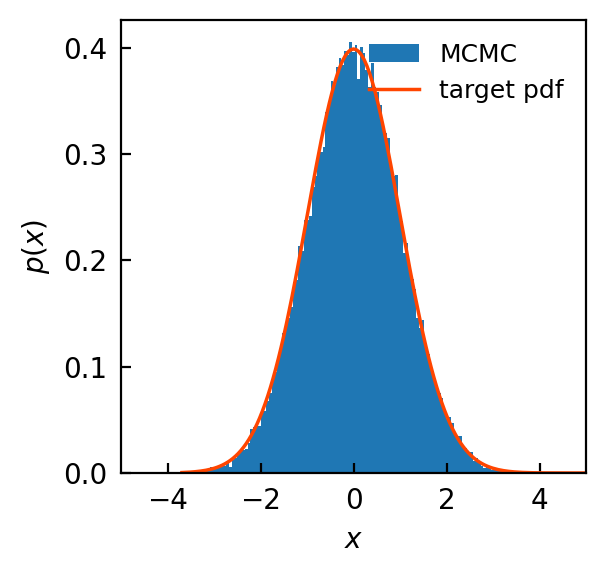

In [8]:
def gauss1d_pdf(x, mean, sigma):
    assert(sigma>0)
    return np.exp(-0.5*((x-mean)/sigma)**2) / (np.sqrt(2*np.pi)*sigma)

plot_pdf(chain, func=gauss1d_pdf, args=[0,1], xlims=[-5,5], ylog=False, bins='auto', label='MCMC')

We can see that samples do follow Gaussian pdf pretty well.

What if we change step size? How well samples follow the histogram for a given sample size does depend on step size. 
Try experimenting with step size using the code above and see how the histogram changes for different step values. 

###  <font color='blue'>Trace plots: looking for a "hairy caterpillar"</font>

Plots of values of sampled numbers as a function of step number are called ***trace plots*** in the MCMC jargon. The trace plot for the chain above is shown below

In [9]:
def plot_trace(x, figsize=3):
    try:
        nsteps, ndims = np.shape(x)[0], np.shape(x)[1]
    except:
        nsteps, ndims = np.shape(x)[0], 1
        
    plt.figure(figsize=(figsize,figsize))
    for d in range(ndims):
        if ndims == 1:
            plt.plot(np.arange(0,nsteps,1), x, lw=0.5, c='darkslateblue', label='d={:d}'.format(d))
        else:
            plt.plot(np.arange(0,nsteps), x[:,d], lw=0.5, c='darkslateblue', label='d={:d}'.format(d))
    plt.ylabel(r'$x$') # label axis 
    plt.xlabel(r'step number')
    plt.show()    

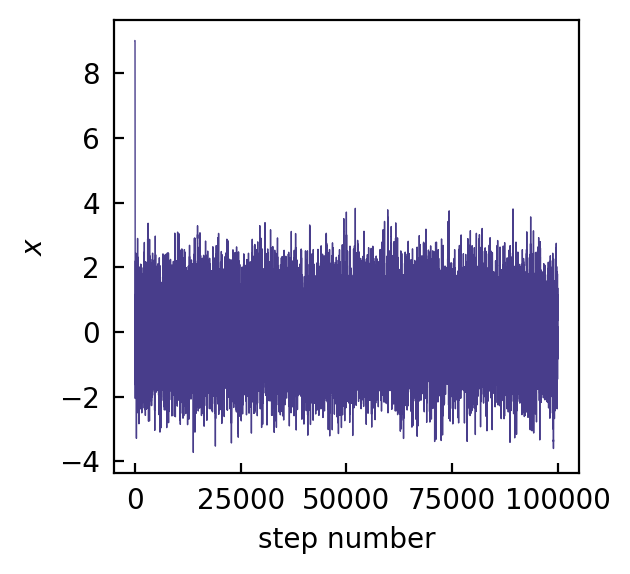

In [10]:
plot_trace(chain)

We can see the sequence of first numbers that followed the initial value of $x_0=10$, which are very unlike for the Gaussian with zero mean and $\sigma=1$. We can see, for example, that in the remaining chain there are no values with $\vert x\vert>5$ that were realized after this initial sequence. This initial sequence of unlikely numbers is called *burn-in* of this chain. Usualy an effort is made to remove them.

The rest of the chain looks pretty good: the numbers bounce around zero sampling different parts of the distribution. 

The trace plot like this looks like a "hairy caterpillar" and an MCMC chain that looks like this likely sampled the distribution well. In the MCMC jargon it is said that the chain is ***converged.***

If we look at the first 1000 steps, this trace no longer looks like a "hairy caterpillar". 

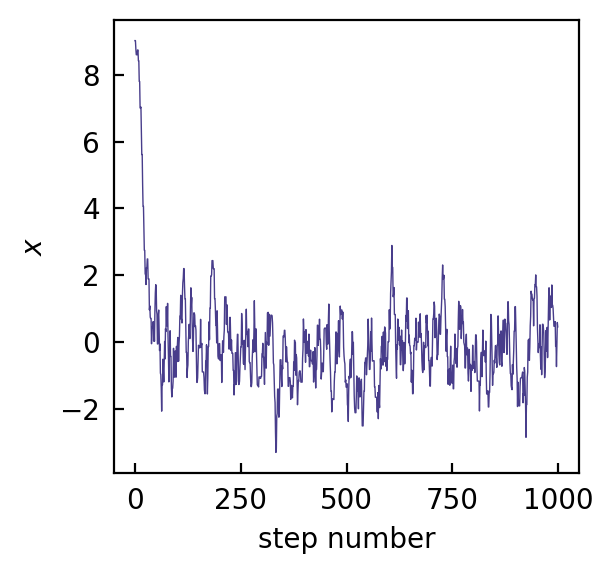

In [11]:
plot_trace(chain[:1000])

A trace like this indicates that the chain has not "converged" yet. This means that distribution is not sampled well with this number of MCMC steps. We can see it in the histogram comparison:

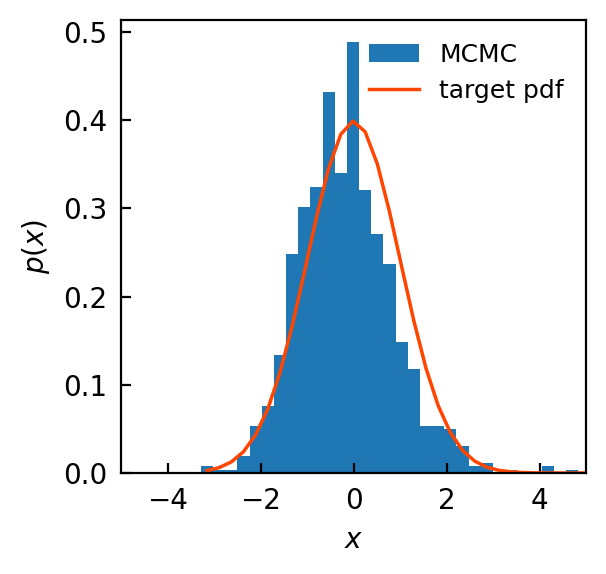

In [12]:
plot_pdf(chain[:1000], func=gauss1d_pdf, args=[0,1], xlims=[-5,5], ylog=False, bins='auto', label='MCMC')

This is not very quantitative, but just like with PRNG randograms visual inspection of trace plots is a simple and good  first check for the quality of the chain we produced. If any of the $d$ variables of $d$-dimensional distribution have trace that looks like the second trace plot above, the distribution is not sampled well in those dimensions. 

### <font color='blue'>Number of independent MCMC samples in the chain</font>

In addition to duplicates in the chain for steps when proposed step was not accepted, not all samples in the MCMC chain are independent. 
    
Even for a well-converged chain with well chosen step size, not all of the samples are independent. Even though the chain is "Markovian" - i.e. next step depends only on the current location of the sample - the chain retains memory of its past trajectory over some number of steps. 

For example, starting at $x_0=10$ in the example, above, it will take some number of steps for $x$ to reach the high probability area around $x=0$. Over this number of steps, there is memory that we started at $x_0=10$. 

You can also see the correlation of successive values in the chain as broad peaks and minima in the second trace plot above. These arise because when an upward or downward fluctuation occur, it is reflect not in just one sample but in several successive samples. 
    
The number of steps, for which this memory is typically retained, can be measured by the ***auto-correlation "time"*** (see below in the material for graduate students) which is the number of steps over which auto-correlation function of the chain has large amplitude. Roughly speaking, the autocorrelation time measures the average width of those peaks and minima in the trace plot. Although this can be estimated properly from the autocorrelation function measured for the chain, one can also examine the trace visually at the scales where individual peaks and valleys can be seen clearly. Autocorrelation time $t_{\rm corr}$ can be roughly estimated as a typical width of the peaks and valleys. 
    
***Note:*** the terminology with time arises because this type of analyses is often done on time series. Here we deal with MCMC step counts, but the jargon still uses "time."

### <font color='blue'>Burn-in</font> 

Declaring the first MCMC sample to be a real sample of a distribution, may seem like cheating and it is, in a way. However, there is a price to pay. 

You can declare $x=10$ to be a sample of $e^{-x^2/2}$, but it is a highly improbable sample. This will make some number of subsequent samples derived from it improbable as well. In practice, this necessitates defining a *"burn-in"* sequence of improbable samples and removing it from the final sample of draws. 

Criteria for defining "burn-in sequence" are fuzzy, however. The recommended heuristic rule is to exclude at least the first $20t_{\rm corr}$ steps in the sequence, where $t_{\rm corr}$ is the estimated auto-correlation "time" (or rather number of steps). 

### <font color='blue'>MCMC convergence</font>

When can we be 100% certain that the chain samples distribution well and is *converged*?
    
This question does not have an exact answer, but there are several heuristic *convergence criteria* that are used. That is, chains are increased not for a fixed number of steps, but until a set of convergence criteria are satisfied.

For example, if we have some accuracy in mind and have a good idea how many *independent* samples $N_{\rm sample}$ we want, we can make estimates of autocorrelation time $t_{\rm corr}$ as the MCMC runs (say with some cadence like every 1000th step) and stop when $N_{\rm sample}>n_{\rm step}/t_{\rm corr}$. The fractional accuracy with which statistics such as the mean of the sampled distribution can be determined is $\sim 1/\sqrt{N_{\rm sample}}$ because quantities estimated from discrete samples are subject to the Poisson "shot noise" that scales with $N_{\rm sample}$ in this way. So if we want quantities with 1\% accuracy, we need at least $N_{\rm sample}\sim 10^4$ *independent* samples. If we want accuracy of $0.1\%$ we need $N_{\rm sample}\sim 10^6$. 
    
    
Note also that for multi-d sampling $t_{\rm corr}$ should be estimated for each dimension separately because distribution that we are sampling can behave very differently along different dimensions. We should keep track of the longest $t_{\rm corr}$ and use it when estimating $N_{\rm sample}$. 


### <font color='blue'>Ensemble MCMC samplers</font>

In the examples so far, we start MCMC sampling from a single sample. However, given that we can do vector operations with NumPy, we can initialize some number of samples and construct multiple MCMC chains at the same time. 

This approach is called *ensemble sampling* and is often used in MCMC methods. The individual chains are called *ensemble walkers* or just *walkers* in the MCMC jargon (because sampling can be thought of as a walk in multi-d space).
    
This will give us more samples in the end because instead of one chain we will get <tt>nwalkers</tt> chains, but this also allows a possibility of good convergence criterion. 

###  <font color='blue'>Take-home points:</font>
    
* Proper application of MCMC requires some care. One should also be on the lookout for spurious results.
    
* At the very least, you should examine trace plots. The best practice is to use auto-correlation time or some other convergence criterion. 

* None of these issues are a show-stopper, however. The method is powerful, albeit often not very efficient, and is the only game in town in many dimensions. 
    
    
* The standard Metropolis MCMC algorithm will have difficulties sampling pdf with narrow "ridges" along certain dimensions. See, for example, example <a href="http://chi-feng.github.io/mcmc-demo/app.html?algorithm=RandomWalkMH&target=banana">here</a>

### <font color='blue'>Affine-invariant ensemble sampler of Goodman & Weare (2010)</font>
    

One of the issues with the simple MCMC algorithm is the need to choose step size. In the examples above you saw that quality of sampling can change dramatically depending on step size. 
For high-dimensional distributions steps usually should be different in different dimensions for good convergence and it is not clear what they should be *a priori*. 
    
<a href="http://msp.org/camcos/2010/5-1/p04.xhtml">Goodman & Weare (2010)</a> have developed a simple MCMC sampling algorithm, which is efficient for distributions that exhibit strong degeneracies (narrow ridges in the pdf) or pdfs with multiple peaks. 

In this method, one initializes a number of walkers (this is why it is called *ensemble sampler*) distributed with a multi-variate Gaussian probability around a starting point. Then MCMC chain is constructed in a way similar to the Metropolis algorithm: proposing a step, estimating probability at the proposed location, and then accepting the step with an acceptance probability. The difference from the Metropolis MCMC is in the way the step is proposed and how acceptance probability is calculated:

* In this method a step from location $\vec{x}_i$ to $\vec{x}_{i+1}$ is proposed as a *stretch* move: $\vec{x}_{i}^{\prime}=\vec{x}_{j}+z_r(\vec{x}_{i}-\vec{x}_j)$, where $\vec{x}_{j}$ is the current location of *another* randomly chosen walker (but not the current one we are updating) and $z_r$ is  a random number drawn from the pdf $g(z)= 1/\sqrt{z}$ for $z\in[1/a,a]$ interval and $g(z)=0$ outside this interval, where GW10 suggest $a=2$. 


* The proposed stretch move is then accepted with probability $p_{\rm acc}={\rm min}[1.0,z_r^{D-1}\pi(\vec{x}_i^{\prime})/\pi(\vec{x})]$, where $\pi$ is the target pdf the chain is supposed to sample and $D$ is the number of components of $\vec{x}$ (i.e., the number of dimensions of the pdf we are sampling; e.g., for the $D=2$ for a 2D Gaussian).  

### <font color='blue'>Why does GW10 sampling algorithm improve Metropolis MCMC?</font>

GW10 algorithm is nearly as simple as Metropolis MCMC, but is much more efficient in sampling distributions and producing good sample chains. Try to examine description of the algorithm above and think what features of the algorithm make it efficient. 

###  <font color='blue'>GW10 algorithm is implemented in the emcee MCMC package</font>

GW10 algorithm is implemented in the most popular MCMC package in astronomy <a href="https://emcee.readthedocs.io/en/v2.2.1/"><tt>emcee</tt></a>. 

To install it, do

    pip install emcee
    
in the Anaconda command prompt or linux/MacOS shell.

In [16]:
import emcee

ndim, nwalkers, nsteps = 1, 10, 10000

# initialize walkers
p0 = np.random.rand(ndim * nwalkers).reshape((nwalkers, ndim))

# initialize MCMC sample
sampler = emcee.EnsembleSampler(nwalkers, ndim, lngauss1d, args=[0,1])

# run for a given nsteps
dummy = sampler.run_mcmc(p0, nsteps)

# get chain
chaingw = sampler.chain

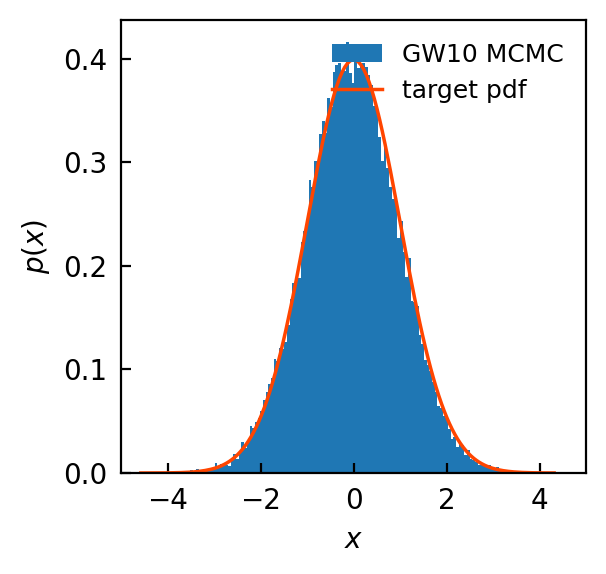

In [19]:
plot_pdf(chaingw.flatten(), func=gauss1d_pdf, args=[0,1], xlims=[-5,5], ylog=False, bins='auto', label='GW10 MCMC')

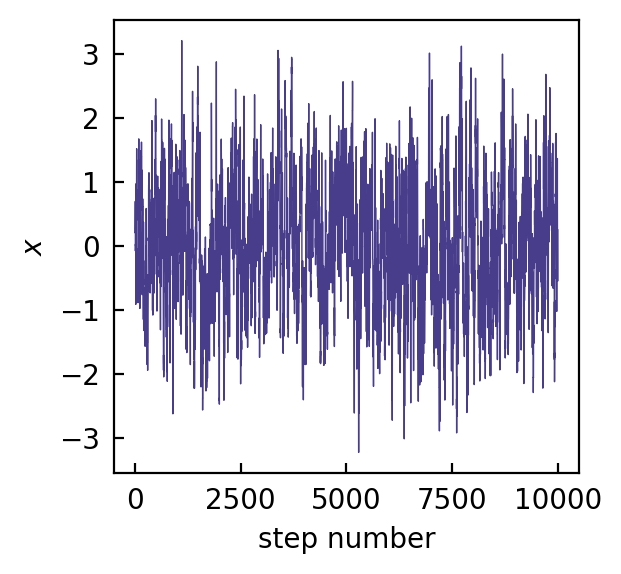

In [20]:
# plot trace of a single walker

plot_trace(chaingw[1,:])

### Recommended

* Illustrative <a href="http://chi-feng.github.io/mcmc-demo/">visualizations of MCMC methods at work</a>.

## <font color='blue'>The following material is optional for undergraduate students, required for graduate students</font>


## <font color='blue'>Hamiltonian Monte Carlo (HMC) sampling</font>

A  qualitatively different approach to how successive Monte Carlo samples are selected is adopted in the Hamilton Monte Carlo (HMC) method. In this method instead of steps in random directions a trajectory from the current location is integrated using DKD or KDK integration method (aka leapfrog) using the logarithm of the function we try to sample to construct "Hamiltonian". The trajectory is then integrated until some stopping criterion is reached. Here is a [brief description](https://colindcarroll.com/2019/04/11/hamiltonian-monte-carlo-from-scratch/) of how trajectory integration is done; please read it. 

After trajectory integration ends, point is accepted or rejected using the same acceptance criterion as in the standard MCMC. 
The key is that because trajectory follows the sampled function, the acceptance rate here is very high. So the expense of integrating trajectory pays off with high acceptance rate of the final samples. 

The stopping criterion in the original version proposed by Radford Neal in 1993, who developed earlier idea of similar sampling introduced in molecular dynamics (see, [Neal 2012](https://arxiv.org/pdf/1206.1901.pdf) for review), was just to make a fixed number of steps of a chosen size. This introduces a tricky problem of choosing step size and number of steps. Later, methods such as No-U-Turn-Sampling (NUTS, [Hoffman & Gelman 2011](https://arxiv.org/abs/1111.4246)), which use clever idea for automatic choice of how long a given trajectory is integrated.  

Although for most practical sampling problems Goodman & Weare algorithm works well, once in a while one has to deal with high-dimensional sampling where HMC is really superior and makes intractable sampling problem tractable. 

## <font color='blue'>Auto-correlation function</font>

For discrete data evaluated at evenly spaced points auto-correlation function is defined as 

$$ 
\xi(j) = \frac{\sum\limits_{i=0}^{N-j-1}\left[(x_i-\bar{x})(x_{i+j}-\bar{x})\right]}{\sum\limits_{i=0}^{N-1}(x_i-\bar{x})^2}.
$$

where $\bar{x}$ is the mean over some large portion of the sequence (say up to <tt>lagmax</tt> parameter in the implementation below). 

The autocorrelation function is defined below along with function that measures autocorrelation time. You don't need to understand these, they are just provided for illustration here.  

In [ ]:
def auto_corr_func(timeseries, lagmax):
    """
    compute auto correlation function
    """
    ts = np.asarray(timeseries)
    n = np.size(ts) - 1
    ts -= np.mean(ts) # set to mean 0
    corr_func = np.zeros(lagmax)
    # compute xi(j) for different j
    for j in range(lagmax):
        # sum of ts[t+dt]*ts[t]
        corr_func[j] = (np.dot(timeseries[0:n-j],timeseries[j:n])) 
    if (corr_func[0] > 0):
        corr_func /= corr_func[0] # normalize
    return corr_func


def compute_tcorr(timeseries, maxcorr):
    """
    compute correlation time
    """
    timeseries = np.copy(timeseries)
    mean = np.mean(timeseries)
    corrfxn = auto_corr_func(timeseries,maxcorr)
    tau = np.sum(corrfxn)-1 # auto-correlation time
    var = np.var(timeseries)
    sigma = np.sqrt(var * tau / len(timeseries))
    return tau, mean, sigma


In [ ]:
maxlag = 200
tcorr, mean, sig = compute_tcorr(chain[:1000], maxlag)
print('auto-correlation time = {:.2f}'.format(tcorr))

The auto-correlation times measured for this chain  only every $\approx 12$th sample is really independent. 

The fractional error of Monte Carlo estimates of various quantities scales as $\propto 1/\sqrt{N_{\rm samples}}$. 

The effective number of samples in the MCMC chain is $N_{\rm samples}\approx N_{\rm chain}/t_{\rm corr}$, where $N_{\rm MCMC}$ is the length of the chain and $t_{\rm corr}$ is its auto-correlation time. 

Large auto-correlation time thus makes effective number of samples small and accuracy of the MCMC estimates based on the chain poor. 

If we rerun the Gaussian chain above with step normalization <tt>step=0.1</tt> we will find that $t_{\rm corr}$ for that chain is $\approx 500$. 

In [ ]:
chain = mcmc_gauss1d(step=0.1)

In [ ]:
maxlag = 1000
tcorr, mean, sig = compute_tcorr(chain[:10000], maxlag)
print('auto-correlation time = {:.2f}'.format(tcorr))

So even if we have 100000 samples, the effective number of independent samples, which is what matters for accuracy of using these samples for any estimes, is $N_{\rm samples}\approx 100000/500\approx 200$. 

Sampling this poor is reflected in the pdf and trace plots. This is why the trace and histogram for look so bad. For this step, we'd need to get a 100 times longer chain to get to $N_{\rm samples}\sim 10^4.$. 

In [ ]:
plot_pdf(chain, func=gauss1d_pdf, args=[0,1], xlims=[-5,5], ylog=False, bins='auto', label='MCMC')

In [ ]:
plot_trace(chain[:10000])

In this case the length of "burn-in" sequence in this case is $\approx 2500$.

### <font color='blue'>Gelman-Rubin convergence indicator</font>

A popular MCMC convergence criterion was proposed by A. Gelman and D. Rubin in 1992 (see, for example, S 1.2 <a href="http://www.stat.columbia.edu/~gelman/research/published/brooksgelman2.pdf">here</a>). 

The idea behind this indicator is that if we have a number of individually advanced chains, we can compare the variance of a  parameter statistic *within* each chain to the variance of that statistic we get across all chains. These variances are divided and compared to 1, because in converged chains the variances should be similar. 

Suppose we use $N_{\rm chains}$ chains with $N$ samples (after $N$ MCMC steps) in each of them. 
The Gelman-Rubin convergence indicator compares two estimates of variance of sampled parameter value $x$ within individual chains and between chains.
    
The *within chain variance* is

$$s^2_{\rm w} = \frac{1}{N_{\rm chains}}\,\sum\limits_{j=1}^{N_{\rm chains}}s^2_j,$$

where $s^2_j$ is variance within chain $j$:

$$s^2_j = \frac{1}{N-1}\,\sum\limits_{i=1}^{N}(x_{ij}-\bar{x}_j)^2$$

And so-called "pooled variance estimate"
    
$$s^2_{\rm v} = \frac{N-1}{N}\,s^2_{\rm w} + \frac{1}{N_{\rm chains}-1}\,\sum\limits_{j=1}^{N_{\rm chains}}(\bar{x}_j-\bar{x})^2,$$
where 
$$\bar{x}_j=\frac{1}{N}\,\sum\limits_{i=1}^{N}x_{ij}$$
is the mean value of parameter within chain $i$, and $\bar{x}$ is the mean of this parameter over all chains:
$$\bar{x}=\frac{1}{N_{\rm chains}}\,\sum\limits_{j=1}^{N_{\rm chains}}\bar{x}_j.$$

As chains converge, the 2nd term in the expression for $s^2_{\rm v}$ should approach 0 as mean variance should decrease, while the first term should converge to $s^2_{\rm w}$ for large $N$. 

The Gelman-Rubin indicator is defined as the ratio of the two variance estimates, which should converge to 1 *for all function parameters* that are sampled. 
    
$$R_{\rm GR}=\frac{s^2_{\rm v}}{s^2_{\rm w}} $$
    
We can define a threshold of how close the $R_{\rm GR}$ must get to 1 for each parameter for convergence (say $R_{\rm GR}$ values for all parameters should be such that $R_{\rm GR}-1<0.001$).  